In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import numpy as np
import pandas as pd

In [2]:
df1 =  pd.read_csv(r"D:\Deep Learning\Deep Learning - Datasets\Fashion MNIST\fashion-mnist_train.csv\fashion-mnist_train.csv")
df2 = pd.read_csv(r"D:\Deep Learning\Deep Learning - Datasets\Fashion MNIST\fashion-mnist_test.csv\fashion-mnist_test.csv")

In [3]:
df1

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df2

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
y_train = df1['label']
x_train =df1.drop(labels=['label'],axis=1)

In [13]:
y_test = df2['label']
x_test =df2.drop(labels=['label'],axis=1)

In [14]:
x_train = x_train.astype('float')/255
x_test = x_test.astype('float')/255

In [15]:
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.000000,0.000000,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.000000,0.000000,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.286275,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.627451,0.635294,0.639216,0.529412,0.368627,0.000000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [16]:
x_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.035294,0.031373,0.000000,...,0.403922,0.341176,0.219608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.054902,0.207843,0.388235,0.066667,...,0.000000,0.000000,0.000000,0.000000,0.247059,0.207843,0.121569,0.000000,0.000000,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.631373,...,0.537255,0.494118,0.549020,0.000000,0.521569,0.878431,0.870588,0.219608,0.000000,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.145098,...,0.125490,0.090196,0.054902,0.078431,0.000000,0.000000,0.003922,0.000000,0.000000,0.0
9996,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.007843,0.203922,0.090196,0.109804,0.000000,0.000000,0.0
9997,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.686275,0.674510,0.674510,0.713725,0.780392,0.870588,0.164706,0.000000,0.003922,0.0
9998,0.0,0.003922,0.011765,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.0


In [17]:
y_train

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [19]:
y_test

0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 10000, dtype: int64

In [20]:
x_train.shape

(60000, 784)

In [21]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [22]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [23]:
x_train.shape

(60000, 28, 28, 1)

In [25]:
x_test.shape

(10000, 28, 28, 1)

In [29]:
model = Sequential([
    Conv2D(filters=64,kernel_size=3,input_shape=(28,28,1),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(filters=64,kernel_size=3,activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.25),
    Dense(256,activation='relu'),
    Dropout(0.25),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax'),
])

In [30]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
h = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.5317 - accuracy: 0.8046
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3422 - accuracy: 0.8771
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2944 - accuracy: 0.8933
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2646 - accuracy: 0.9041
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2426 - accuracy: 0.9100
Epoch 6/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.2264 - accuracy: 0.9168
Epoch 7/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2121 - accuracy: 0.9211
Epoch 8/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.2006 - accuracy: 0.9266
Epoch 9/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1863 - accuracy: 0.9323
Epoch 10/10
1875/1875 [==============================] - 45s 24m

In [34]:
test_loss,test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.2592 - accuracy: 0.9044


In [35]:
print("Losss : {}".format(test_loss))
print("Accuracy : {}".format(test_acc))

Losss : 0.2591745853424072
Accuracy : 0.9043999910354614


In [36]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

313/313 [==============================] - 2s 6ms/step
7
Sneaker


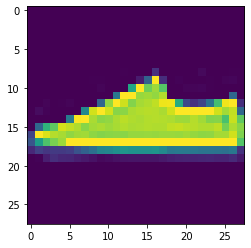

In [44]:
import random

n = random.randint(0,999)

plt.imshow(x_test[n])

predicted_values  = model.predict(x_test)
output = np.argmax(predicted_values[n])

print(output)
print(class_labels[output])

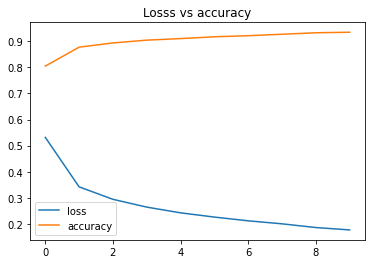

In [45]:
plt.title("Losss vs accuracy")
plt.plot(h.history['loss'],label='loss')
plt.plot(h.history['accuracy'],label='accuracy')
plt.legend()